In [1]:
import numpy as np
import matplotlib.pyplot as plt
from numpy import genfromtxt

%matplotlib inline
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

In [2]:
data_file = "../Data/Jawbone/2016.csv" # Data File Path
data_features = "Jawbone/features.csv" # Data File Path

In [3]:
def filterData (data):
    #Removes null data (and corresponding features)
    h, w = data.shape
    data = np.where((data == ''), 0, data)
    empty = [np.all(np.delete([0 if col[i] == '' else col[i] for col in data], [0]).astype(float) == 0) for i in range(w)]
    n = [i for i in range(np.array(empty).size) if empty[i] == True]
    return np.delete(data, n, axis=1)

In [4]:
data = filterData(genfromtxt(data_file, dtype=None, delimiter=','))
features = data[0]
features_desc = genfromtxt(data_features, dtype=str, delimiter=',')

In [5]:
print features

['DATE' 'age' 'avg_bg' 'bmr' 'goal_body_weight' 'height' 'm_active_time'
 'm_calories' 'm_distance' 'm_inactive_time' 'm_lcat' 'm_lcit' 'm_steps'
 'm_steps_3am' 'm_total_calories' 'max_bg' 'min_bg' 'num_readings' 'rhr'
 's_asleep_time' 's_awake' 's_awake_time' 's_awakenings' 's_bedtime'
 's_clinical_deep' 's_count' 's_duration' 's_light' 's_rem' 's_to_bed_phr'
 'weight']


In [6]:
def getIndex (data, features):
    index = []
    for f in features:
        index.append(np.where((data[0] == f) == True)[0][0])
    return index

def getFeatures (data, features):
    h, w = data.shape
    index = getIndex(data, features)
    extracted = np.zeros(h-1)
    for i in index:
        temp = np.delete([0 if col[i] == '' else col[i] for col in data], [0]).astype(float)
        temp /= np.amax(temp)
        extracted = np.vstack((extracted, temp))
    extracted = np.delete(extracted, 0, 0)
    return extracted

In [7]:
f1 = ['m_total_calories', 'm_steps', 'rhr', 'avg_bg']
data1 = getFeatures(data, f1)

In [8]:
def remNull (x, y):
    nullX = np.where((x == 0) == True)[0].tolist()
    nullY = np.where((y == 0) == True)[0].tolist()
    null  = list(set(nullX + nullY))

    x = np.delete(x, null, 0)
    y = np.delete(y, null, 0)

    return x, y

def calculateVar (x, y):
    x, y = remNull(x,y)
    meanX = np.mean(x)
    meanY = np.mean(y)
    n = float(x.shape[0])
    return ((1/n)*(np.sum((x-meanX)*(y-meanY))))

def calculateCov (data):
    h, w = data.shape
    cov = np.zeros([h, h])

    for i in range(h):
        for j in range(h):
            cov[i][j] = calculateVar(data[i], data[j])
    return cov

In [9]:
print calculateCov (data1)

[[ 0.00604976  0.01217981 -0.00011985 -0.00017121]
 [ 0.01217981  0.03124336 -0.00015033 -0.0003892 ]
 [-0.00011985 -0.00015033  0.00244121  0.0005929 ]
 [-0.00017121 -0.0003892   0.0005929   0.00156371]]


In [10]:
def plotFeatures (title, label1, label2, feature1, feature2):
    plt.scatter(feature1, feature2)
    
    plt.title(title)
    plt.xlabel(label1)
    plt.ylabel(label2)
    
    plt.xlim(0, 1)
    plt.ylim(0, 1)
    
    plt.show()
    
def plotMatrix(data):
    r, c = data.shape
    c=2
    fig = plt.figure()
    plotID = 1
    for i in range(c):
        for j in range(c):
            f1 = getFeature(data, data[0][i])
            f2 = getFeature(data, data[0][j])
            ax = fig.add_subplot( c, c, plotID )
            ax.scatter(f1, f2)
            ax.set_title(data[0][i] + ' vs ' + data[0][j])
            ax.axis('off')
            plotID += 1
    plt.show()
    
def plotMatrix1(features, data):
    r, c = data.shape
    fig = plt.figure()
    plotID = 1
    for i in range(r):
        for j in range(r):
            ax = fig.add_subplot( r, r, plotID )
            x,y = remNull(data[i], data[j])
            ax.scatter(x, y)
            ax.set_title(features[i] + ' vs ' + features[j])
            ax.tick_params(axis='x', which='major', labelsize=8)
            ax.tick_params(axis='y', which='major', labelsize=8)
            plotID += 1
    plt.show()

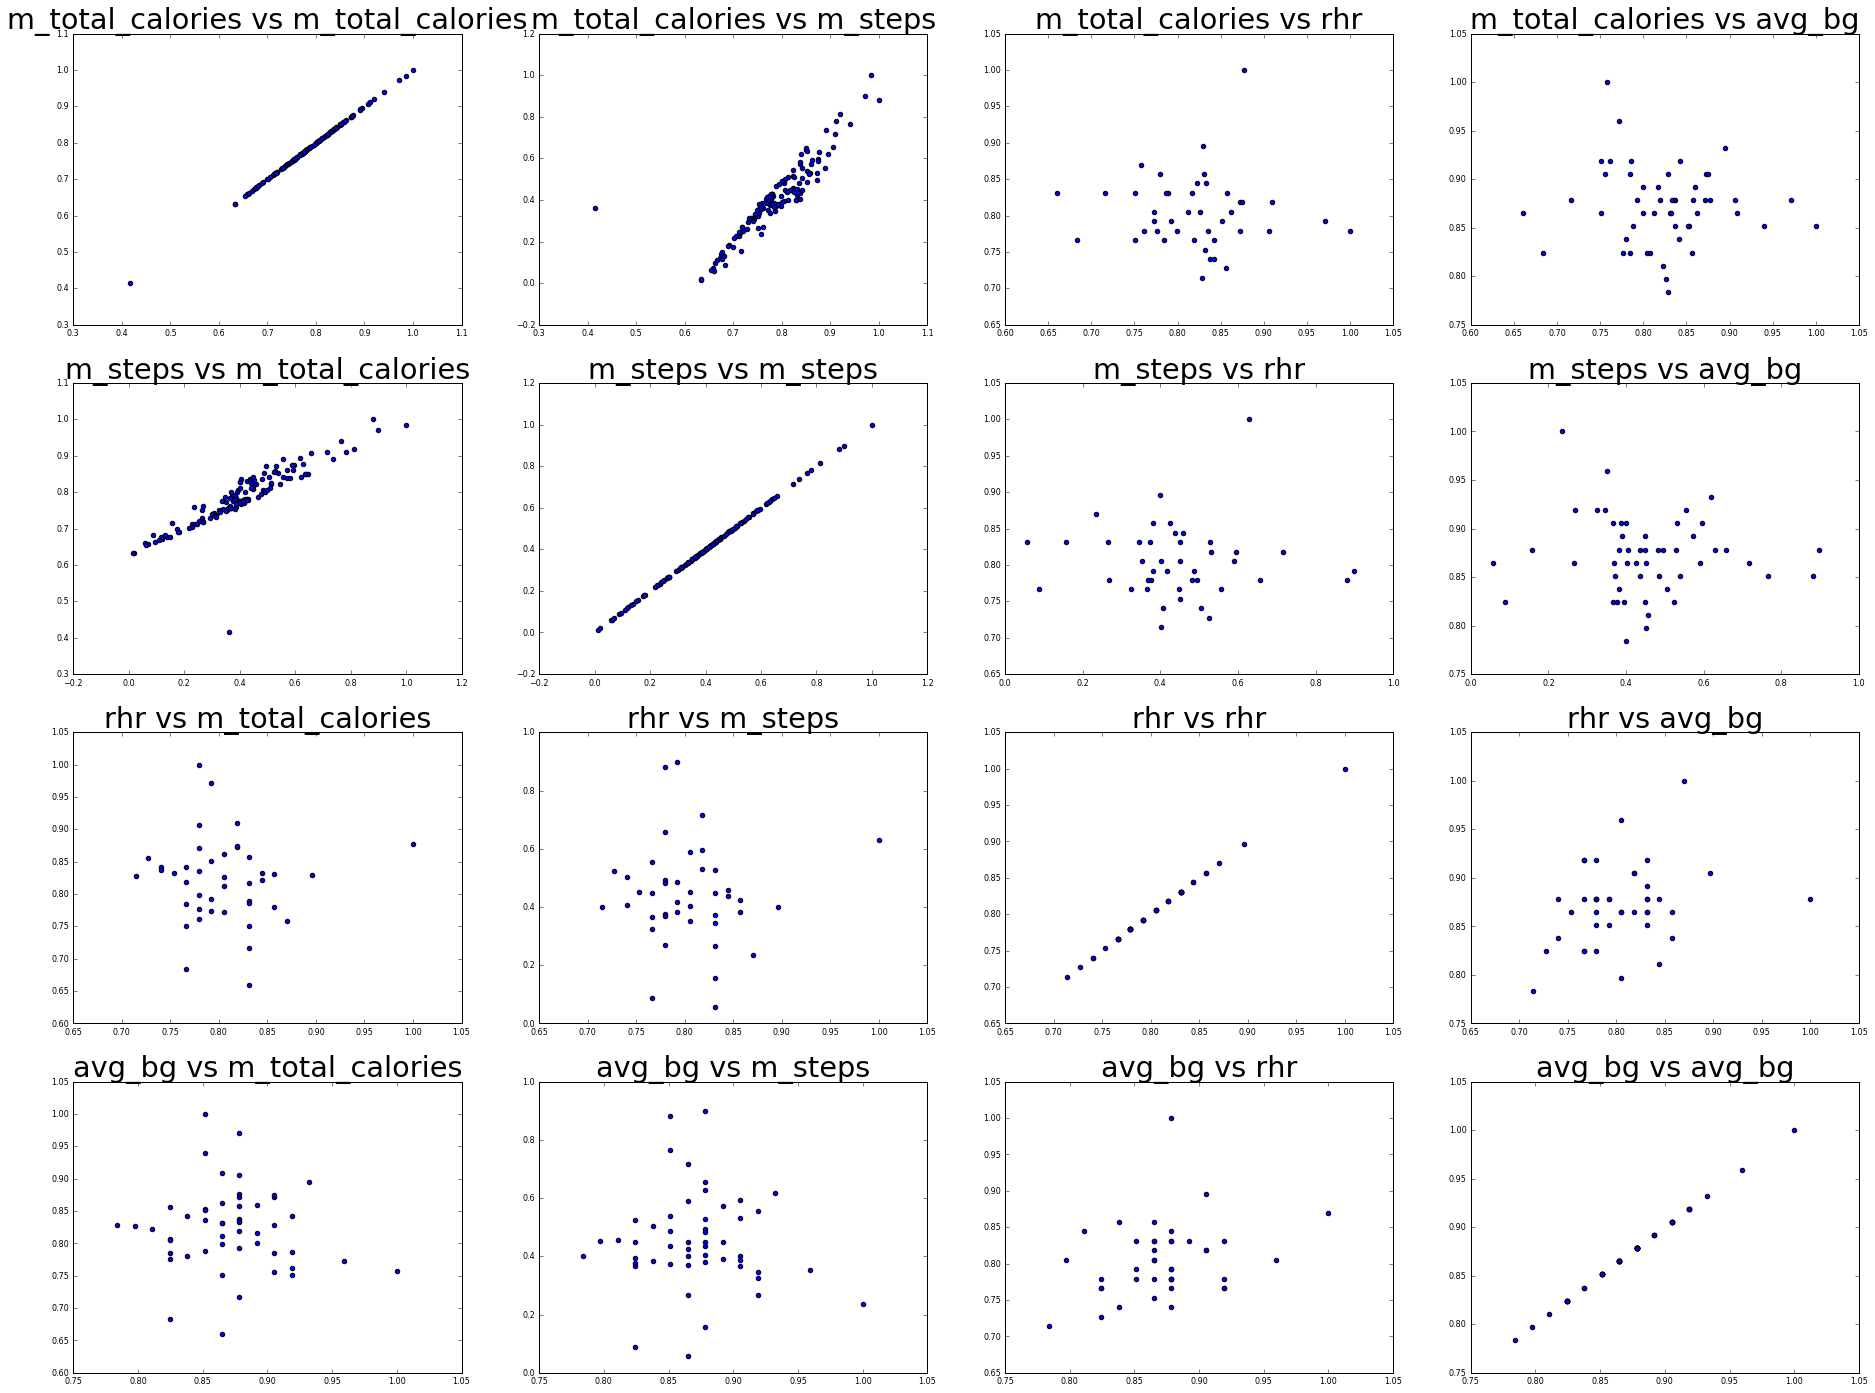

In [11]:
plotMatrix1(f1, data1)